# Meaningful Question 2: 
## For the homes where we have data on the last year renovated, does year renovated have a similar impact as age?

## Imports

In [1]:
import pandas as pd
import numpy as np
from helpers import *
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

df = pd.read_csv("kc_house_data.csv")

## Data Cleaning

In [2]:
# Creating a new dataframe with only these four columns
yr_df = df.filter(["date", "price", "yr_built", "yr_renovated"])

In [3]:
# Filling null values with 0
yr_df["yr_renovated"] = yr_df["yr_renovated"].fillna(0)

In [4]:
# Changing years in the Year Renovated column to integers
yr_df["yr_renovated"] = yr_df["yr_renovated"].apply(lambda x: to_int(x))

In [5]:
# Changing dates in the Date column into datetime objects
yr_df['date'] = pd.to_datetime(yr_df['date'])

In [6]:
# New column for the year a home was sold, derived from the Date column
yr_df['yr_sold'] = pd.DatetimeIndex(yr_df['date']).year

In [7]:
# New column for age of homes
yr_df['home_age'] = yr_df["yr_sold"] - yr_df["yr_built"]

#### Creating a dataframe with all homes that have information on when they were renovated

In [8]:
with_reno_df = yr_df.where(yr_df["yr_renovated"] > 0).dropna()

In [9]:
# Creating a new column just for this 'with renovations' dataframe, 
# showing the number of years since the home was renovated
with_reno_df['since_reno'] = with_reno_df["yr_sold"] - yr_df["yr_renovated"]

In [10]:
# Excluding those renovated since they were sold
with_reno_df = with_reno_df.where(with_reno_df["since_reno"] > 0)

#### Creating a dataframe with all homes that do not have information on when they were renovated

In [11]:
without_reno_df = yr_df.where(yr_df["yr_renovated"] == 0).dropna()

In [12]:
# Excluding those built after they were sold
without_reno_df = without_reno_df.where(without_reno_df["home_age"] > 0)

## Data Overview

In [13]:
age_col = without_reno_df["home_age"]
since_reno_col = with_reno_df["since_reno"]

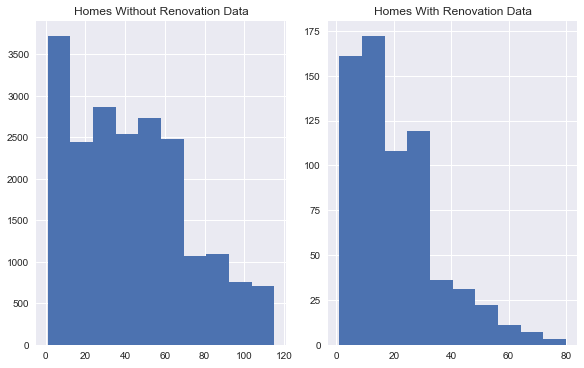

In [14]:
f1_1, axes = plt.subplots(1, 2, figsize=(8,5), constrained_layout=True)

ax1_0 = age_col.hist(ax=axes[0])
ax1_1 = since_reno_col.hist(ax=axes[1])

ax1_0.title.set_text("Homes Without Renovation Data")
ax1_1.title.set_text("Homes With Renovation Data")

plt.show()

In [15]:
age_log = np.log(age_col)
since_reno_log = np.log(since_reno_col)

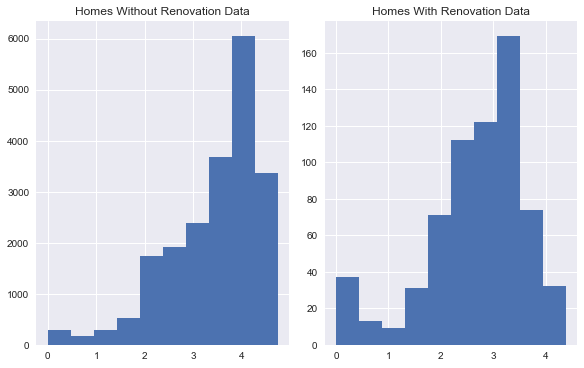

In [16]:
f1_2, axes = plt.subplots(1, 2, figsize=(8,5), constrained_layout=True)

ax1_2_0 = age_log.hist(ax=axes[0])
ax1_2_1 = since_reno_log.hist(ax=axes[1])

ax1_2_0.title.set_text("Homes Without Renovation Data")
ax1_2_1.title.set_text("Homes With Renovation Data")

plt.show()

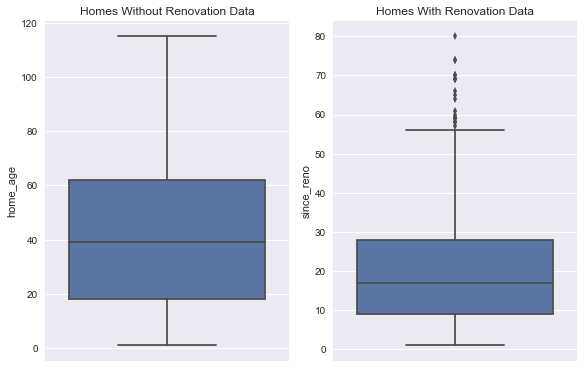

In [17]:
f2, axes = plt.subplots(1, 2, figsize=(8,5), constrained_layout=True)

ax2_0 = sns.boxplot(age_col, orient='v', ax=axes[0])
ax2_1 = sns.boxplot(since_reno_col, orient='v', ax=axes[1])

ax2_0.title.set_text("Homes Without Renovation Data")
ax2_1.title.set_text("Homes With Renovation Data")

plt.show()

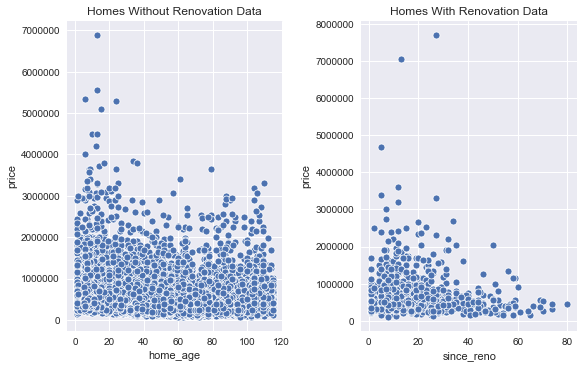

In [18]:
f3, axes = plt.subplots(1, 2, figsize=(8,5), constrained_layout=True)

ax3_0 = sns.scatterplot(x="home_age", y="price", data=without_reno_df, ax=axes[0])
ax3_1 = sns.scatterplot(x="since_reno", y="price", data=with_reno_df, ax=axes[1])

ax3_0.title.set_text("Homes Without Renovation Data")
ax3_1.title.set_text("Homes With Renovation Data")

plt.show()

## Modeling

In [19]:
model_without_reno = ols(formula=('price~yr_built'), data=without_reno_df).fit()
model_without_reno.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     103.7
Date:                Tue, 07 May 2019   Prob (F-statistic):           2.70e-24
Time:                        09:08:29   Log-Likelihood:            -2.8951e+05
No. Observations:               20411   AIC:                         5.790e+05
Df Residuals:                   20409   BIC:                         5.790e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.189e+06   1.69e+05     -7.047      0.000   -1.52e+06   -8.58e+05
yr_built     871.2692     85.560     10.183      0.000     703.564    1038.974
==============================================================================
Omnibus:                    16804.817   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           682406.334
Skew:                           3.719   Prob(JB):                         0.00
Kurtosis:                      30.333   Cond. No.                     1.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model_with_reno = ols(formula=('price~yr_renovated'), data=with_reno_df).fit()
model_with_reno.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     17.49
Date:                Tue, 07 May 2019   Prob (F-statistic):           3.28e-05
Time:                        09:08:29   Log-Likelihood:                -9911.5
No. Observations:                 670   AIC:                         1.983e+04
Df Residuals:                     668   BIC:                         1.984e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.294e+07   3.28e+06     -3.944      0.000   -1.94e+07    -6.5e+06
yr_renovated  6878.1674   1644.869      4.182      0.000    3648.431    1.01e+04
==============================================================================
Omnibus:                      671.144   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37702.636
Skew:                           4.478   Prob(JB):                         0.00
Kurtosis:                      38.642   Cond. No.                     2.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Summary

The answer is yes, but it's an unsatisfying yes. The year a home was built is a terrible predictor for the price of a home, as is the year a home was renovated. They are both bad predictors!